In [2]:
######### =-=-==-=-=-= Linear Regression =-=-==-=-=-= ########

In [ ]:
### =-=-==-=-=-= How it Works =-=-==-=-=-= ###

In [ ]:
import tensorflow as tf

(0.0, 6.0, 0.0, 20.0)

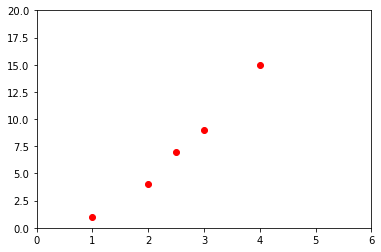

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

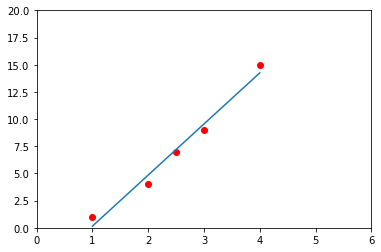

In [13]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [ ]:
### =-=-==-=-=-= Setup and Imports =-=-==-=-=-= ###

In [14]:
!pip install -q sklearn

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

In [ ]:
### =-=-==-=-=-= Data =-=-==-=-=-= ###

In [23]:
# Load dataset.
all_dataset = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [24]:
all_dataset.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [25]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [18]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [26]:
dftrain.shape

(627, 9)

In [27]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<AxesSubplot:>

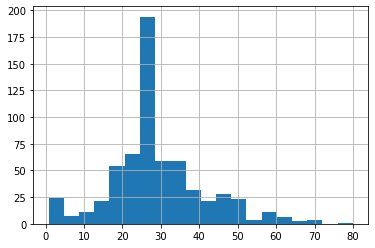

In [32]:
dftrain.age.hist(bins=20)

<AxesSubplot:>

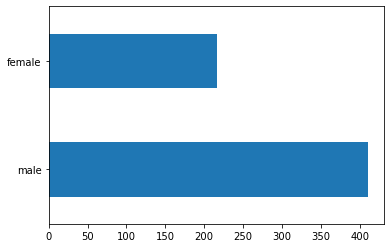

In [33]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

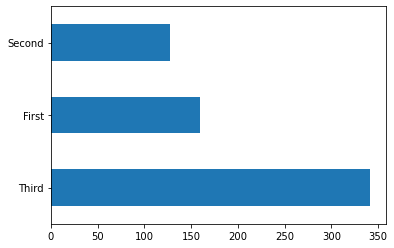

In [34]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

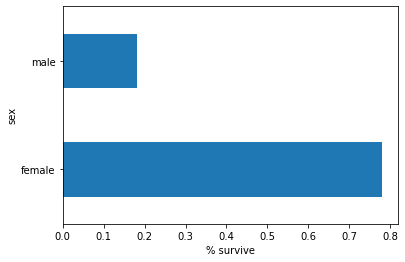

In [35]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [ ]:
'''
After analyzing this information, we should notice the following:
    Most passengers are in their 20's or 30's
    Most passengers are male
    Most passengers are in "Third" class
    Females have a much higher chance of survival
'''

In [ ]:
### =-=-==-=-=-= Feature Columns =-=-==-=-=-= ###

In [59]:
CATEGORICAL_COLUMNS = ['sex', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare', 'n_siblings_spouses', 'parch']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='n_siblings_spouses', shape=(1,), defaul

In [60]:
print(feature_columns[0])
print(feature_columns[7])

VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [ ]:
### =-=-==-=-=-= Input Function =-=-==-=-=-= ###

In [61]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [ ]:
### =-=-==-=-=-= Creating the Model =-=-==-=-=-= ###

In [62]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier
clear_output()

In [ ]:
### =-=-==-=-=-= Training and Predicting the Model =-=-==-=-=-= ###

In [63]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()
print(result['accuracy'])  # the result variable is a dict of stats about our model

0.7651515


In [64]:
print(result)

{'accuracy': 0.7651515, 'accuracy_baseline': 0.625, 'auc': 0.8354454, 'auc_precision_recall': 0.7912767, 'average_loss': 0.47357678, 'label/mean': 0.375, 'loss': 0.46133068, 'precision': 0.69473684, 'prediction/mean': 0.39193767, 'recall': 0.6666667, 'global_step': 200}


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jorge\AppData\Local\Temp\tmpw1f__r9p\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

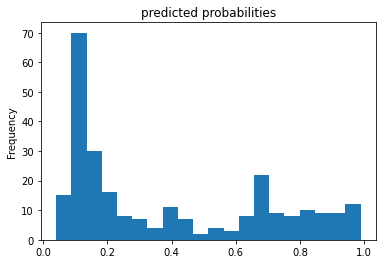

In [65]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

In [71]:
result = list(linear_est.predict(eval_input_fn))
num = 100
print(dfeval.loc[num])
print(y_eval.loc[num])
print(result[num]['probabilities'][1])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jorge\AppData\Local\Temp\tmp0z_elvdc\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                            30
n_siblings_spouses              0
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 100, dtype: object
0
0.09198852


In [ ]:
######### =-=-==-=-=-= Classification =-=-==-=-=-= ########

In [ ]:
### =-=-==-=-=-= Data =-=-==-=-=-= ###

In [72]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0s/step


In [76]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [77]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [78]:
train.shape

(120, 4)

In [ ]:
### =-=-==-=-=-= Input Function =-=-==-=-=-= ###

In [79]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [ ]:
### =-=-==-=-=-= Feature Columns =-=-==-=-=-= ###

In [80]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
### =-=-==-=-=-= Building the Model =-=-==-=-=-= ###

In [81]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jorge\\AppData\\Local\\Temp\\tmpz0ijam_m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
### =-=-==-=-=-= Training the Model =-=-==-=-=-= ###

In [87]:
classifier.train(input_fn=lambda: input_fn(train, train_y, training=True),steps=5000)
# We include a lambda to avoid creating an inner function previously
clear_output()

In [ ]:
### =-=-==-=-=-= Evaluation =-=-==-=-=-= ###

In [89]:
eval_result = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))
clear_output()
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.933



In [ ]:
### =-=-==-=-=-= Predictions =-=-==-=-=-= ###

In [99]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}
probability = []

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    for num in range(0, len(SPECIES)):
        probability.append(pred_dict['probabilities'][num])

        print('Prediction is ({:.1f}%) for "{}" '.format(100 * probability[num], SPECIES[num]))

Please type numeric values as prompted.
SepalLength: 5.9
SepalWidth: 3.
PetalLength: 4.2
PetalWidth: 1.5
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jorge\AppData\Local\Temp\tmpz0ijam_m\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is (3.6%) for "Setosa" 
Prediction is (58.3%) for "Versicolor" 
Prediction is (38.0%) for "Virginica" 


In [ ]:
######### =-=-==-=-=-= Clustering =-=-==-=-=-= ########

In [ ]:
'''
Code later
'''

In [ ]:
######### =-=-==-=-=-= Hidden Markov Models =-=-==-=-=-= ########

In [105]:
!pip install --use-feature=2020-resolver tensorflow-probability
import tensorflow_probability as tfp
clear_output()

In [ ]:
### =-=-==-=-=-= Weather Model =-=-==-=-=-= ###

In [ ]:
'''
1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 25% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day
    and mean and standard deviation 15 and 10 on a hot day.
'''

In [113]:
tfd = tfp.distributions  # making a shortcut for later on
initial_distribution = tfd.Categorical(probs=[0.25, 0.75])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above

# the loc argument represents the mean and the scale is the standard devitation

In [114]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

In [115]:
mean = model.mean()

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:  
  print(mean.numpy())

[11.25     10.125001  9.562501  9.281251  9.140625  9.070312  9.035155]
